In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\ss\Desktop\Groceries_dataset.csv")

In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df["Date"] = pd.to_datetime(df['Date'])

C:\Users\ss\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ss\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ss\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ss\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Provide format or specify infer_date

In [7]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


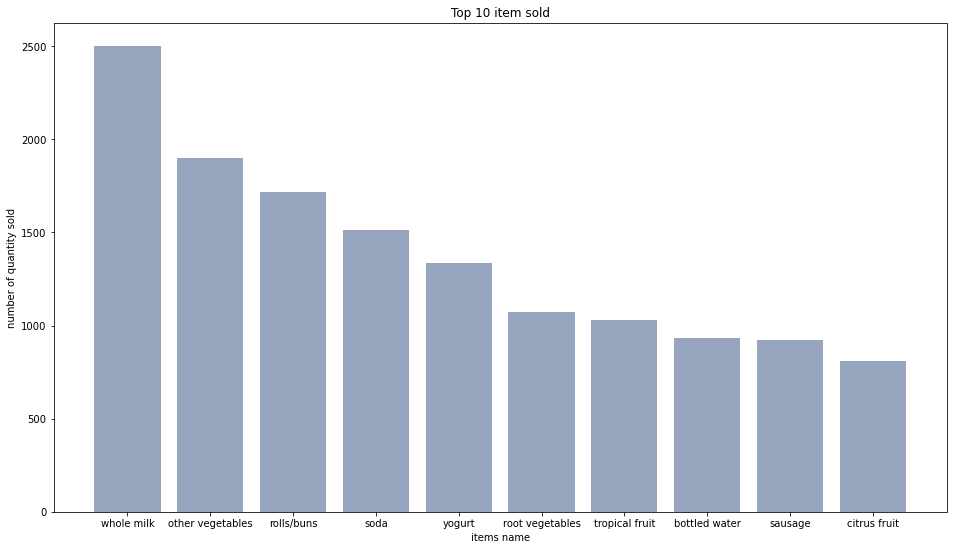

In [8]:
item_dist = df.groupby(by = 'itemDescription').size().reset_index(name = 'frequency').sort_values(by = 'frequency', ascending = False).head(10)

bars = item_dist['itemDescription']
height = item_dist['frequency']
x_pos = np.arange(len(bars))

plt.figure(figsize = (16,9))
plt.bar(x_pos, height, color=(0.2,0.3,0.5,0.5))
plt.title('Top 10 item sold')
plt.xlabel('items name')
plt.ylabel('number of quantity sold')
plt.xticks(x_pos, bars)

plt.show()

In [9]:
df_date = df.set_index(['Date'])

[Text(0.5, 0, 'names'), Text(0, 0.5, ' No of item sold')]

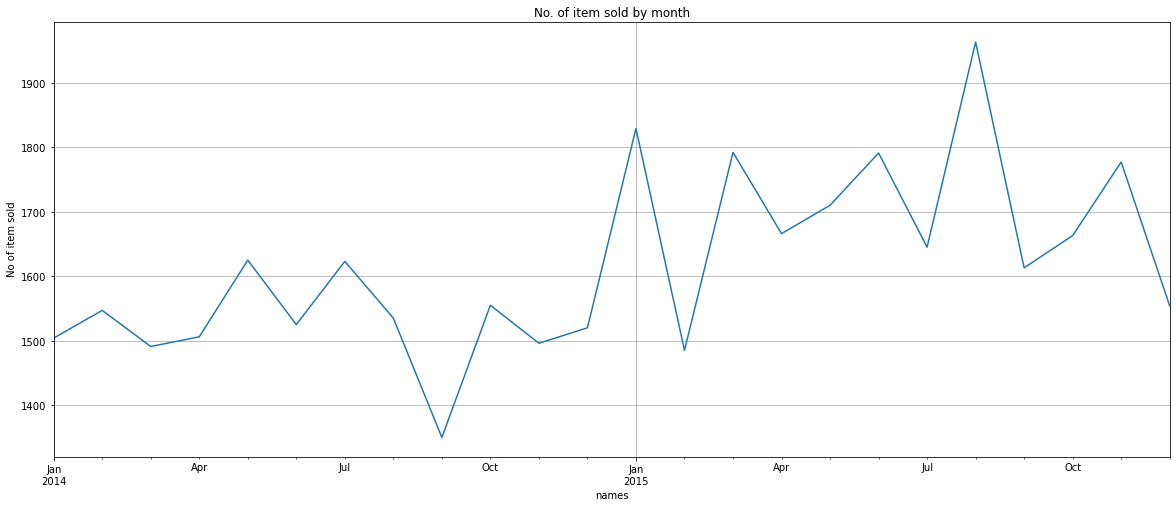

In [10]:
df_date.resample('M')['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "No. of item sold by month").set(xlabel = 'names' , ylabel = ' No of item sold')

In [11]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False)
cust_level["itemDescription"] = cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [12]:
transaction = [a[1]['itemDescription'].tolist() for a in list (cust_level.groupby(["Member_number"]))]

In [13]:
from apyori import apriori
rules = apriori(transactions = transaction, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2 )

In [14]:
results = list(rules)

In [15]:
results

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [19]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    support = [result[1] for result in results]
    confidence  = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs,rhs, support, confidence, lifts ))
resultindf = pd.DataFrame(inspect(results), columns = ['Left hand side', 'Right hand side', 'Support', 'Confidence', 'lift'])

In [20]:
resultindf.head()

,Left hand side,Right hand side,Support,Confidence,lift
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
1,potato products,beef,0.002565,0.454545,3.802185
2,canned fruit,coffee,0.002309,0.428571,3.728954
3,meat spreads,domestic eggs,0.003592,0.400000,3.004239
4,flour,mayonnaise,0.002309,0.063380,3.338599


In [23]:
resultindf.nlargest(n=10, columns = 'Confidence')

,Left hand side,Right hand side,Support,Confidence,lift
315,waffles,yogurt,0.003592,0.933333,3.298398
613,tropical fruit,yogurt,0.002822,0.916667,3.239498
303,packaged fruit/vegetables,root vegetables,0.002309,0.818182,3.547578
4764,waffles,whole milk,0.002052,0.800000,4.180161
310,sweet spreads,root vegetables,0.002052,0.727273,3.153403
961,chocolate,bottled water,0.002052,0.727273,3.403252
1017,specialty chocolate,bottled water,0.002052,0.727273,3.403252
1521,oil,whole milk,0.002052,0.727273,3.800146
2308,tropical fruit,sausage,0.002052,0.727273,3.530397
3392,hamburger meat,whole milk,0.002052,0.727273,3.800146
